## Loading the environments

In [64]:
import os
from dotenv import load_dotenv
load_dotenv()

True

## Importing the packages

In [65]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

import datetime

In [66]:
# model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

In [67]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro", temperature=0)

## Some utility functions

In [68]:
# to display the graph
def display_graph(app):
    # this function will display the graph of the app
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        # This requires some extra dependencies and is optional
        print(e)



# To stream the output of the app
def stream_output(app, input):
    for output in app.stream(input):
        for key,value in output.items():
            print(f"here is output from {key}")
            print("_______")
            print(value)
            print("\n")

In [69]:
#defining the state
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [70]:
model.invoke("What is the weather in hyderabad?")

AIMessage(content="Of course! Here is the current weather and forecast for **Hyderabad, Telangana, India**.\n\nAs of **Friday, 7:30 PM IST**:\n\n### **Currently: 27°C (81°F)**\n*   **Condition:** Clear skies\n*   **Feels Like:** 28°C (83°F)\n*   **Wind:** 9 km/h from the East\n*   **Humidity:** 68%\n\n---\n\n### **Today's Forecast**\n\n*   **Tonight's Low:** 23°C (73°F)\n*   **Overall:** Expect a clear and comfortable evening.\n\n---\n\n### **Upcoming Forecast**\n\n*   **Saturday:** **33°C / 23°C** - Mostly sunny and hot.\n*   **Sunday:** **33°C / 23°C** - Sunny with some passing clouds.\n*   **Monday:** **34°C / 24°C** - Hazy sunshine and warm.\n\nHave a pleasant evening", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--7e8130aa-d70e-4899-84ae-f844c707bcd5-0', usage_metadata={'input_tokens': 9, 'output_tokens': 1699, 'total_tokens': 1708, 'inp

## Part 1: Access to tools

In [71]:
# tavily seaarch tool ---> for api go to https://app.tavily.com/home and generate an api key
from langchain_tavily import TavilySearch

search_tool = TavilySearch(max_results=2)
search_tool.invoke("What is langgraph")


{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [72]:
search_tool.invoke("What is the weather in hyderabad?")

{'query': 'What is the weather in hyderabad?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in Hyderabad',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Hyderabad', 'region': 'Telangana', 'country': 'India', 'lat': 17.3753, 'lon': 78.4744, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1754117728, 'localtime': '2025-08-02 12:25'}, 'current': {'last_updated_epoch': 1754117100, 'last_updated': '2025-08-02 12:15', 'temp_c': 30.1, 'temp_f': 86.2, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 9.6, 'wind_kph': 15.5, 'wind_degree': 299, 'wind_dir': 'WNW', 'pressure_mb': 1009.0, 'pressure_in': 29.8, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 59, 'cloud': 50, 'feelslike_c': 31.0, 'feelslike_f': 87.9, 'windchill_c': 31.7, 'windchill_f': 89.1, 'heatindex_c': 33.5, 'heatindex_f': 92.4, 'dewpoint_c': 18.6, 'dewpoint_f': 65.6, 

## lets create 6 tools

In [73]:
#defining search tool
search_tool = TavilySearch(max_results  = 2)


def search_web(user_question):
    """
    This function will search a web search for the user question
    Args:
        user_question (str): The question to search
    Returns:
        search_results (list): The search results
    """
    search_results = search_tool.invoke(user_question)["results"]
    return search_results

#mathematical tool - addition
def add_numbers(a,b):
    """
    This function will add two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The sum of the two numbers
    """
    return a+b

#mathematical tool - subtraction
def subtract_numbers(a,b):
    """
    This function will subtract two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The difference of the two numbers
    """
    return a-b

#mathematical tool - multiplication
def multiply_numbers(a,b):
    """
    This function will multiply two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The product of the two numbers
    """
    return a*b

#mathematical tool - division
def divide_numbers(a,b):
    """
    This function will divide two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The quotient of the two numbers
    """
    return a/b


# tooll to get the current time
def get_current_time():
    """
    This function will get the current time
    Returns:
        result (str): The current time
    """
    return datetime.now().strftime("%H:%M:%S")


In [74]:
tools_list = [search_web, add_numbers, subtract_numbers, multiply_numbers, divide_numbers, get_current_time]

In [75]:
#bind the tools with llm
llm_with_tool = model.bind_tools(tools_list)

In [76]:
llm_with_tool

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.5-pro', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000017276D66FD0>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'search_web', 'description': 'This function will search a web search for the user question\nArgs:\n    user_question (str): The question to search\nReturns:\n    search_results (list): The search results', 'parameters': {'properties': {'user_question': {}}, 'required': ['user_question'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add_numbers', 'description': 'This function will add two numbers\nArgs:\n    a (int): The first number\n    b (int): The second number\nReturns:\n    result (int): The sum of the two numbers', 'parameters': {'properties': {'a': {}, 'b': {}}, 'required': ['a', 'b'], 'type': 'object

In [77]:
#defining the nodes 
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}

In [78]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", END)

app = workflow.compile()

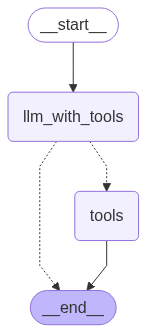

In [79]:
display_graph(app)

In [80]:
response = app.invoke({"messages": "What is the current tariff put by USA on india?"})

In [81]:
response

{'messages': [HumanMessage(content='What is the current tariff put by USA on india?', additional_kwargs={}, response_metadata={}, id='c94f0e35-d4d7-4f0d-a372-12f0eb9371bc'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"user_question": "current tariff put by USA on India"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--0c7ed8be-e337-453a-8a50-d40fd4ed106e-0', tool_calls=[{'name': 'search_web', 'args': {'user_question': 'current tariff put by USA on India'}, 'id': 'ebb9a800-ceb1-4f92-ba69-6e65a7e5bba6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 472, 'output_tokens': 157, 'total_tokens': 629, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 134}}),
  ToolMessage(content='[{"url": "https://apnews.com/article/trump-tariffs-russia-india-9e388a55583e7007149819c52f0fd71b",

In [82]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the current tariff put by USA on india?
================================== Ai Message ==================================
Tool Calls:
  search_web (ebb9a800-ceb1-4f92-ba69-6e65a7e5bba6)
 Call ID: ebb9a800-ceb1-4f92-ba69-6e65a7e5bba6
  Args:
    user_question: current tariff put by USA on India
================================= Tool Message =================================
Name: search_web

[{"url": "https://apnews.com/article/trump-tariffs-russia-india-9e388a55583e7007149819c52f0fd71b", "title": "Trump announces 25% tariff on India starting Aug. 1 - AP News", "content": "WASHINGTON (AP) — The United States will impose a 25% tariff on goods from India, plus an additional import tax because of India's purchasing", "score": 0.76512027, "raw_content": null}, {"url": "https://www.bbc.com/news/articles/c0j91p8w20vo", "title": "Trump's tariffs could deal a blow to India's growth and exports - BBC", "cont

In [83]:
response = app.invoke({"messages":"What is 5 multiplied by 4"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (63418a56-cafe-4c50-9381-711d64d0ddb2)
 Call ID: 63418a56-cafe-4c50-9381-711d64d0ddb2
  Args:
    b: 4.0
    a: 5.0
================================= Tool Message =================================
Name: multiply_numbers

20.0


In [84]:
## this is something to note about 
response=app.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (1c60a546-36f7-4ce3-ac76-903388331d6b)
 Call ID: 1c60a546-36f7-4ce3-ac76-903388331d6b
  Args:
    b: 4.0
    a: 5.0
  search_web (ec5db8ff-0ed8-4741-b2ea-d9bd698838e7)
 Call ID: ec5db8ff-0ed8-4741-b2ea-d9bd698838e7
  Args:
    user_question: where is taj mahal
================================= Tool Message =================================
Name: multiply_numbers

20.0
================================= Tool Message =================================
Name: search_web

[{"url": "https://maps.apple.com/place?auid=14589998842081006790", "title": "Taj Mahal in Agra, Uttar Pradesh, India - Apple Maps", "content": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 16

In [85]:
## this is something to note about 
response=app.invoke({"messages":"What is (5 * 2 + 12 /6) multiplied by 4 and where is Golconda Fort in India "})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is (5 * 2 + 12 /6) multiplied by 4 and where is Golconda Fort in India 
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (d793df45-7724-4917-b440-f870f9e0ad84)
 Call ID: d793df45-7724-4917-b440-f870f9e0ad84
  Args:
    b: 2.0
    a: 5.0
  divide_numbers (0315047f-aa98-4338-a9fd-e8d45e288c84)
 Call ID: 0315047f-aa98-4338-a9fd-e8d45e288c84
  Args:
    b: 6.0
    a: 12.0
  search_web (90ca7b54-4f85-4f89-94d6-5923b9cb1b81)
 Call ID: 90ca7b54-4f85-4f89-94d6-5923b9cb1b81
  Args:
    user_question: where is Golconda Fort in India
================================= Tool Message =================================
Name: multiply_numbers

10.0
================================= Tool Message =================================
Name: divide_numbers

2.0
================================= Tool Message =================================
Name: search_web

[{"ur

## Part 2: Improving the workflow by passing the tools output back to llm - ReACT agent

In [86]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", "llm_with_tools")

app2 = workflow.compile()

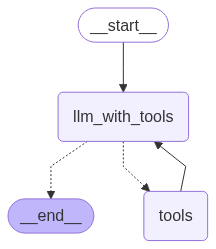

In [87]:
display_graph(app2)

In [88]:
response=app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (78091878-db5e-414c-952d-cd827f19fd45)
 Call ID: 78091878-db5e-414c-952d-cd827f19fd45
  Args:
    b: 4.0
    a: 5.0
  search_web (bfb5b22b-681d-4fab-8ee9-9e6b01453654)
 Call ID: bfb5b22b-681d-4fab-8ee9-9e6b01453654
  Args:
    user_question: where is taj mahal
================================= Tool Message =================================
Name: multiply_numbers

20.0
================================= Tool Message =================================
Name: search_web

[{"url": "https://maps.apple.com/place?auid=14589998842081006790", "title": "Taj Mahal in Agra, Uttar Pradesh, India - Apple Maps", "content": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 16

In [89]:
app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='e4574e94-91c1-442d-b1de-4b065cd1b119'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"user_question": "where is taj mahal"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--a0f38d0e-36ff-4ab8-9a76-ccd35e6584cd-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'b': 4.0, 'a': 5.0}, 'id': '0ed66972-66b9-4eb5-bfd8-0793da08fbfa', 'type': 'tool_call'}, {'name': 'search_web', 'args': {'user_question': 'where is taj mahal'}, 'id': '58dfd573-ffb9-4eb8-80c7-49f43278277f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 474, 'output_tokens': 379, 'total_tokens': 853, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 339}}),
  ToolMessage(content='20

In [90]:
app2.invoke({"messages":"What is 5 multiplied by 4 and add 15 to it"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and add 15 to it', additional_kwargs={}, response_metadata={}, id='6894b962-26ae-4fa8-9a95-1e987162d7a5'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply_numbers', 'arguments': '{"b": 4.0, "a": 5.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--4a2e5412-d3b2-4932-91fa-40f9f12f2457-0', tool_calls=[{'name': 'print', 'args': {'message': 'I will first multiply 5 by 4.'}, 'id': 'e08cf920-88c7-4900-ac2b-5f82037d8ca3', 'type': 'tool_call'}, {'name': 'multiply_numbers', 'args': {'b': 4.0, 'a': 5.0}, 'id': '8acc61e5-1da3-447c-8992-3ea6ba01be34', 'type': 'tool_call'}], usage_metadata={'input_tokens': 476, 'output_tokens': 714, 'total_tokens': 1190, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 673}}),
  ToolMessage(content='Error: print is not 

In [92]:
## this is something to note about 
response = app.invoke({"messages":"What is (5 * 2 + 12 /6) multiplied by 4 and where is Golconda Fort in India "})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is (5 * 2 + 12 /6) multiplied by 4 and where is Golconda Fort in India 
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (177474de-060b-4b76-9096-5106267eb988)
 Call ID: 177474de-060b-4b76-9096-5106267eb988
  Args:
    b: 2.0
    a: 5.0
  divide_numbers (e4a33780-cfef-44d0-8af3-2831813ee8dc)
 Call ID: e4a33780-cfef-44d0-8af3-2831813ee8dc
  Args:
    b: 6.0
    a: 12.0
  search_web (ce21c75e-a27d-454e-8e22-7e2d18a7542b)
 Call ID: ce21c75e-a27d-454e-8e22-7e2d18a7542b
  Args:
    user_question: where is Golconda Fort in India
================================= Tool Message =================================
Name: multiply_numbers

10.0
================================= Tool Message =================================
Name: divide_numbers

2.0
================================= Tool Message =================================
Name: search_web

[{"ur

## Part 3: Inbuilt ReACT agent by langgraph

In [93]:
from langgraph.prebuilt import create_react_agent

In [94]:
react_agent = create_react_agent(
    model=model,
    tools=tools_list
)


In [95]:
react_agent.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='d7db0187-79e9-486d-a169-9c9c73bbf20d'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"user_question": "where is taj mahal"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--10bf6a23-3dbf-4497-bba5-06ddfd59abff-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'b': 4.0, 'a': 5.0}, 'id': 'f3a90774-b3ff-471b-bbeb-45043b438a4d', 'type': 'tool_call'}, {'name': 'search_web', 'args': {'user_question': 'where is taj mahal'}, 'id': '9eb798ab-b76d-44c0-9162-da23e08cd3a5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 474, 'output_tokens': 343, 'total_tokens': 817, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 303}}),
  ToolMessage(content='20

## Part 4 : Memory in langgraphs

In [96]:
app2.invoke({"messages":"Hey my name is Suman"})

{'messages': [HumanMessage(content='Hey my name is Suman', additional_kwargs={}, response_metadata={}, id='80ece217-858f-4268-aa2c-1ece309db799'),
  AIMessage(content='Hello Suman! How can I help you today? ', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--27de996a-feee-4b89-8329-0b18c238bada-0', usage_metadata={'input_tokens': 467, 'output_tokens': 11, 'total_tokens': 478, 'input_token_details': {'cache_read': 0}})]}

In [97]:
app2.invoke({"messages":"Hey what is my name"})

{'messages': [HumanMessage(content='Hey what is my name', additional_kwargs={}, response_metadata={}, id='5be12040-aba3-468f-969d-12630bd18699'),
  AIMessage(content='I am sorry, but I do not have access to your name. I am a large language model, and I do not have access to any of your personal information.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--59680b06-ee80-491a-8dc0-7934a8255a15-0', usage_metadata={'input_tokens': 466, 'output_tokens': 189, 'total_tokens': 655, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 155}})]}

In [98]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", "llm_with_tools")

app3 = workflow.compile(checkpointer = memory)

In [99]:
config = {"configurable":{"thread_id":"1"}}
response = app3.invoke({"messages":"Hi my name is Suman"},config = config)
print(response["messages"][-1].content)

Hello Suman! How can I help you today?


In [100]:
response=app3.invoke({"messages":"hey what is my name"},config=config)
print(response["messages"][-1].content)

You told me your name is Suman.


## Part 5 : Streaming in Langgraph

Methods: .stream() and astream()

These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

values : This streams the full state of the graph after each node is called. \
updates : This streams updates to the state of the graph after each node is called.


In [102]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in app3.stream({'messages':"Hi,My name is Suman And I like cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='1e8bc779-90fa-4f95-b00b-bc3145d28cbb'), HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='b2dd1c2f-442f-43c4-b82a-4a7d39093574')]}
{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='1e8bc779-90fa-4f95-b00b-bc3145d28cbb'), HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='b2dd1c2f-442f-43c4-b82a-4a7d39093574'), AIMessage(content="Hello Suman, it's nice to meet you. I'm a large language model, trained by Google. It", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--cc97e93e-ea9d-4f3d-bce9-d993017384be-0', usage_metadata={'input_toke

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in app3.stream({'messages':"oh i love movies too"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='40c95168-3e4c-435c-9e3e-20ad7947bfd4'), AIMessage(content="Hi Suman, it's nice to meet you. I am a large language model, trained by Google. I hope you are having a great day.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--2d738db5-fcf4-4ac1-ac4a-1834a302fb54-0', usage_metadata={'input_tokens': 472, 'output_tokens': 85, 'total_tokens': 557, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 53}}), HumanMessage(content='oh i love movies too', additional_kwargs={}, response_metadata={}, id='aa8b8981-8b6a-4645-85a9-1505b8ddcfec')]}
{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='40c95168-3e4c-435c-9e3e-20ad7947bfd4'), 

In [ ]:
# using updates method : only the recent values are reflected
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in app3.stream({'messages':"Hi,My name is Suman And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'llm_with_tools': {'messages': [AIMessage(content="Hi Suman! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player? Or maybe you play cricket yourself?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 350, 'total_tokens': 383, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-Bz5yTbGVyekkvQTs4euFjXVwk7aoy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--594ace72-c162-41ee-91ac-ec45a9bc3c73-0', usage_metadata={'input_tokens': 350, 'output_tokens': 33, 'total_tokens': 383, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [ ]:
config = {"configurable": {"thread_id": "3"}}

for chunk in app3.stream({'messages':"oh i love movies too"},config,stream_mode = "updates"):
    print(chunk)

{'llm_with_tools': {'messages': [AIMessage(content="That's great! What kind of movies do you enjoy the most? Any favorite genres or films?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 344, 'total_tokens': 364, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BzuHPO6u9pTGwiiCiJ7f8qLKsMAF2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5f6296c5-42a1-47e2-aa61-ab82b431bda3-0', usage_metadata={'input_tokens': 344, 'output_tokens': 20, 'total_tokens': 364, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [ ]:
config = {"configurable": {"thread_id": "4"}}

async for event in app3.astream_events({"messages":["Hi My name is Suman and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Suman and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '3ed1fa8c-b8ed-45e1-9990-1908251da83a', 'metadata': {'thread_id': '4'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Suman and I like to play cricket', additional_kwargs={}, response_metadata={}, id='7c205b60-58d9-417f-8b8f-d1d8a4a636ba')]}}, 'name': 'llm_with_tools', 'tags': ['graph:step:1'], 'run_id': 'cbecd6ea-f46d-4e02-91c6-f22499ac3a55', 'metadata': {'thread_id': '4', 'langgraph_step': 1, 'langgraph_node': 'llm_with_tools', 'langgraph_triggers': ('branch:to:llm_with_tools',), 'langgraph_path': ('__pregel_pull', 'llm_with_tools'), 'langgraph_checkpoint_ns': 'llm_with_tools:77ea0598-52ce-51b8-09b8-fb57999d651e'}, 'parent_ids': ['3ed1fa8c-b8ed-45e1-9990-1908251da83a']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My n

## Part 6 : Human In the loop

In [103]:
from typing import Annotated

from langchain_tavily import TavilySearch
from typing_extensions import TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langchain_core.tools import tool
from langgraph.types import Command, interrupt

class State(TypedDict):
    messages: Annotated[list, add_messages]

model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

memory = MemorySaver()

@tool
def human_assistance(query: str) -> str:
    """Request assistance from a human."""
    human_response = interrupt({"query": query})
    return human_response["data"]

search_tool = TavilySearch(max_results=2)
tool_list = [search_tool, human_assistance]
llm_with_tools = model.bind_tools(tool_list)

def tool_calling_llm(state: State):
    message = llm_with_tools.invoke(state["messages"])
    return {"messages": [message]}


workflow  = StateGraph(State)
workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools", ToolNode(tools=tool_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition,
)
workflow.add_edge("tools", "llm_with_tools")

app_human = workflow.compile(
    checkpointer=memory,
    interrupt_before=["tools"])

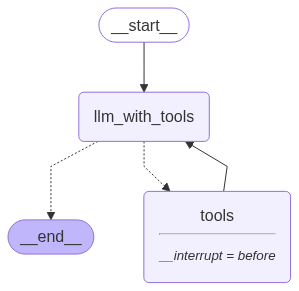

In [104]:
display(app_human)

In [105]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Hello, I am John")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='25077e5a-3a9d-48e3-a771-44076c20b10a'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cn3o7ZKZIs45CD0CtcdeprNt7r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f049198-dc90-46bb-b795-861a6c316d2c-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [106]:
config = {"configurable": {"thread_id": "100"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='1f0f1138-49e1-440d-9369-17f6ede451be'),
  AIMessage(content="No, you haven't introduced yourself yet. Would you like to introduce yourself now?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1297, 'total_tokens': 1314, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cr2ux0nYND7mk0LsgPaR9knwhn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--66a43516-0116-4b9d-a453-a4352d5eddc9-0', usage_metadata={'input_tokens': 1297, 'output_tokens': 17, 'total_tokens': 1314, 'input_token_details': {'audio': 0, 'cache_read'

In [107]:
config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='25077e5a-3a9d-48e3-a771-44076c20b10a'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cn3o7ZKZIs45CD0CtcdeprNt7r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f049198-dc90-46bb-b795-861a6c316d2c-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [108]:

from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="I want to invest in apple stock. how is the stock price?")

app_human.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='25077e5a-3a9d-48e3-a771-44076c20b10a'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cn3o7ZKZIs45CD0CtcdeprNt7r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f049198-dc90-46bb-b795-861a6c316d2c-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [109]:
snapshot = app_human.get_state(config)
snapshot.next

('tools',)

In [110]:
app_human.invoke(None, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='25077e5a-3a9d-48e3-a771-44076c20b10a'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cn3o7ZKZIs45CD0CtcdeprNt7r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f049198-dc90-46bb-b795-861a6c316d2c-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),


In [ ]:
#extra

In [111]:
config = {"configurable": {"thread_id": "1"}}
user_input = "I need some expert guidance and assistance for building an AI agent"

for chunk in app_human.stream({'messages':user_input},config,stream_mode="values"):
    if "messages" in chunk:
        chunk["messages"][-1].pretty_print()


================================ Human Message =================================

I need some expert guidance and assistance for building an AI agent
================================== Ai Message ==================================

Building an AI agent can be an exciting and complex project! To provide you with the best guidance and assistance, could you please share more details about your AI agent? For example:

1. What is the primary purpose or function of the AI agent?
2. What kind of data or inputs will it work with?
3. Are you looking to build it from scratch or use existing frameworks or platforms?
4. What is your level of experience with AI, machine learning, and programming?
5. Do you have any specific technologies or programming languages in mind?

With this information, I can offer tailored advice, resources, and next steps. If you want, I can also connect you with human experts for more specialized help.


In [112]:
human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)

human_command = Command(resume={"data": human_response})

events = app_human.stream(human_command, config, stream_mode="values")
for event in events:
    print(event)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='25077e5a-3a9d-48e3-a771-44076c20b10a'), AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 1294, 'total_tokens': 1305, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-C01Cn3o7ZKZIs45CD0CtcdeprNt7r', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f049198-dc90-46bb-b795-861a6c316d2c-0', usage_metadata={'input_tokens': 1294, 'output_tokens': 11, 'total_tokens': 1305, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), Hu

In [113]:
## good tutorial 
# https://github.com/Coding-Crashkurse/LangGraph-Tutorial/blob/main/human_in_loop.ipynb